# Pokemón

## Seccion 1:
## Juego de cartas pokemón, combinaciones de mano

In [55]:
library(prob)

Pokémon: Juego de Cartas Coleccionables es un juego de cartas coleccionables competitivo para dos jugadores basado en la saga de videojuegos Pokémon.


En una partida de Pokémon Trading Card Game, los jugadores asumen el papel de un entrenador Pokémon durante un combate de forma análoga a los videojuegos. Para poder jugar, cada jugador debe tener una baraja de 60 cartas que habrá preparado previamente. La composición de las barajas es libre.

**Fuente:**

[Pokémon Trading Card Game](https://es.wikipedia.org/wiki/Pokémon_Trading_Card_Game)

Tomando en cuenta que existen 801 pokemones en nuestra base de datos ¿Cuantas posibles manos existen dentro del juego Pokemón?

In [19]:
#se escogen 60 cartas de un total de 801
# se trata de una combinación 801 C  60

choose(801, 60)

[1] 2.057847e+91

In [20]:
cat('Existe un total de:', choose(801, 60) , 'distintas manos dentro del juego')

Existe un total de: 2.057847e+91 distintas manos dentro del juego

**Existen practicamente una infinidad de posibles manos al jugar este juego.**

## Inicio de Juego

"En primer lugar, los jugadores deberán barajar sus respectivas barajas. A continuación, cada uno robará 7 cartas que se quedará en su mano sin mostrarlas al contrincante. Si alguno de los dos jugadores no posee en su mano al menos un Pokémon básico (es decir, un Pokémon que no sea evolución de otro), entonces deberá mostrar sus cartas al oponente para demostrarlo; devolver sus cartas, barajar de nuevo, y robar 7 cartas. El oponente, a cambio, puede robar una carta adicional. El proceso se debe de hacer hasta que ambos jugadores posean al menos en su mano un Pokémon básico." (wikipedia)

In [2]:
#se escogen 7 cartas de un total de 60
# se trata de una combinación 60 C  7
choose(60, 7)

[1] 386206920

**Con las 60 cartas de incio se pueden tener 386,206,920 formas distintas de iniciar una partida**

Si la regla de inicio dice que debes de tener al menos un Pokémon básico, ¿cuál es la probabilidad de escogerlo entre las 7 primeras cartas de inicio si solo tienes uno de ellos en tus 60 cartas?

**devido a que sacar 7 cartas en sucesión y sin reemplazo no son eventos independientes la probabilidad de sacar una determinada carta se puede calcular con la siguente expresion**

$$ P(S) = P(\{e_1, e_2, \dots , e_n\}) = P(e_1 \cup e_2 \cup \dots \cup e_n) = \displaystyle \sum_{i=1}^n P(e_i)$$

**pero se debe de tomar en cuena que se tratan de una Probabilidad condicional para cada evento**


**si solo Sí solo se tiene una carta de Pokémon básico, la probabilidad de sacarla en un mazo de 60 cartas, eligiendo 7 al azar es:**

In [47]:
7/60

[1] 0.1166667

**Dado que hay una penalización si no se obtiene una carta de Pokémon básico, la probabilidad obtenida 0.12 al tener solo una en el mazo es muy baja**

con el teorema de bayes podemos responder a preguntas como estas:

si un jugador que cuenta con 3 cartas en su mazo, ya eligio 4 cartas y no tiene todavia una carta de Pokémon básico, cual es la probabilidad de que pueda sacarla en las tres siguientes cartas, 

**Calculo de sacar una carta de Pokémon básico en las 56 cartas restantes considerando que hay 3 Pokémon básico en el mazo**

In [ ]:
**probabilidad que salga en la primera carta**

In [49]:
3/56

[1] 0.05357143

**probabilidad que salga en la segunda carta**
$P(E2 \cap E1^c) = P(E2|E1^c)P(E1^c) $


In [51]:
(3/55)*(1-3/56)

[1] 0.05162338

**probabilidad que salga en la tercera carta**
$P(E3 \cap E1^c \cap E2^c) = P(E3|E1^c \cap E2^c)P(E1^c \cap E2^c) = P(E3|E1^c \cap E2^c) P(E2^c|E1^c)P(E1^c) $

In [52]:
(3/54)*(1-(3/55)*(1-3/56))*(1-3/56)

[1] 0.04986504

**la probibilidad resultante es**

In [53]:
3/56 + (3/55)*(1-3/56) + (3/54)*(1-(3/55)*(1-3/56))*(1-3/56)

[1] 0.1550598

# Pokemón
## Seccion 2:
## Generar histogramas generales de pokemones

In [4]:
library(tidyverse)
library(prob)
library(ggplot2)
library(tidyr)
library("dplyr")

In [6]:
pokemon <- read_csv(file = "pokemon.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.




**se hace un summary de la informacion para darse una primer idea**

In [10]:
summary(pokemon)

  abilities          against_bug      against_dark   against_dragon  
 Length:801         Min.   :0.2500   Min.   :0.250   Min.   :0.0000  
 Class :character   1st Qu.:0.5000   1st Qu.:1.000   1st Qu.:1.0000  
 Mode  :character   Median :1.0000   Median :1.000   Median :1.0000  
                    Mean   :0.9963   Mean   :1.057   Mean   :0.9688  
                    3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
                    Max.   :4.0000   Max.   :4.000   Max.   :2.0000  
                                                                     
 against_electric against_fairy   against_fight    against_fire  
 Min.   :0.000    Min.   :0.250   Min.   :0.000   Min.   :0.250  
 1st Qu.:0.500    1st Qu.:1.000   1st Qu.:0.500   1st Qu.:0.500  
 Median :1.000    Median :1.000   Median :1.000   Median :1.000  
 Mean   :1.074    Mean   :1.069   Mean   :1.066   Mean   :1.135  
 3rd Qu.:1.000    3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :4.000    Max.   :4.000   Max.   :4.

**se hacen los histogramas generales para primera visualizacion**

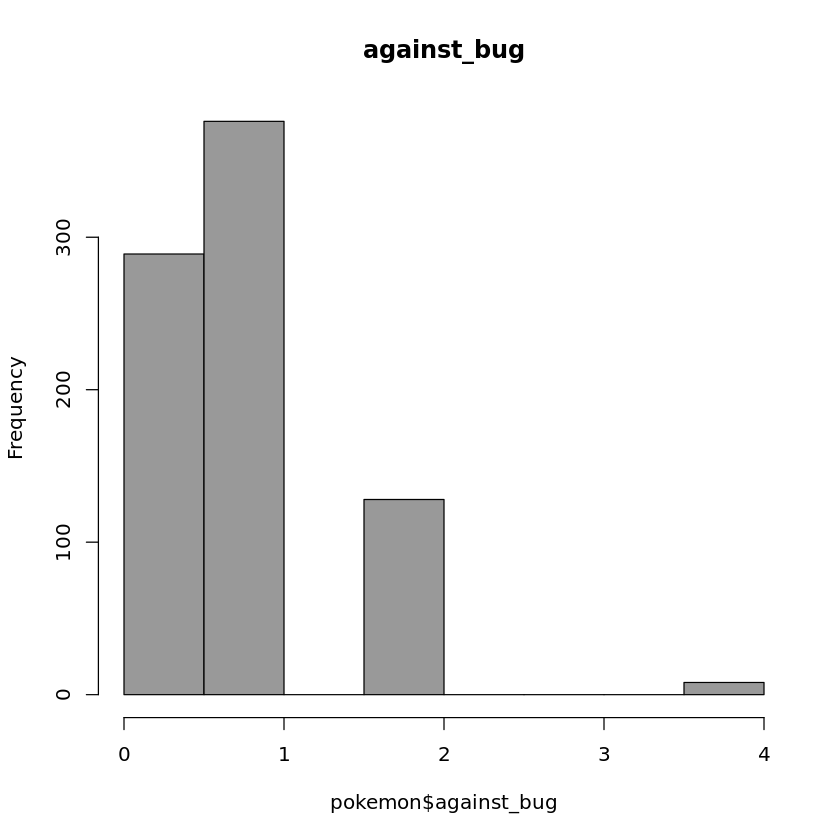

In [12]:
hist(pokemon$against_bug  , main="against_bug", col='gray60') 

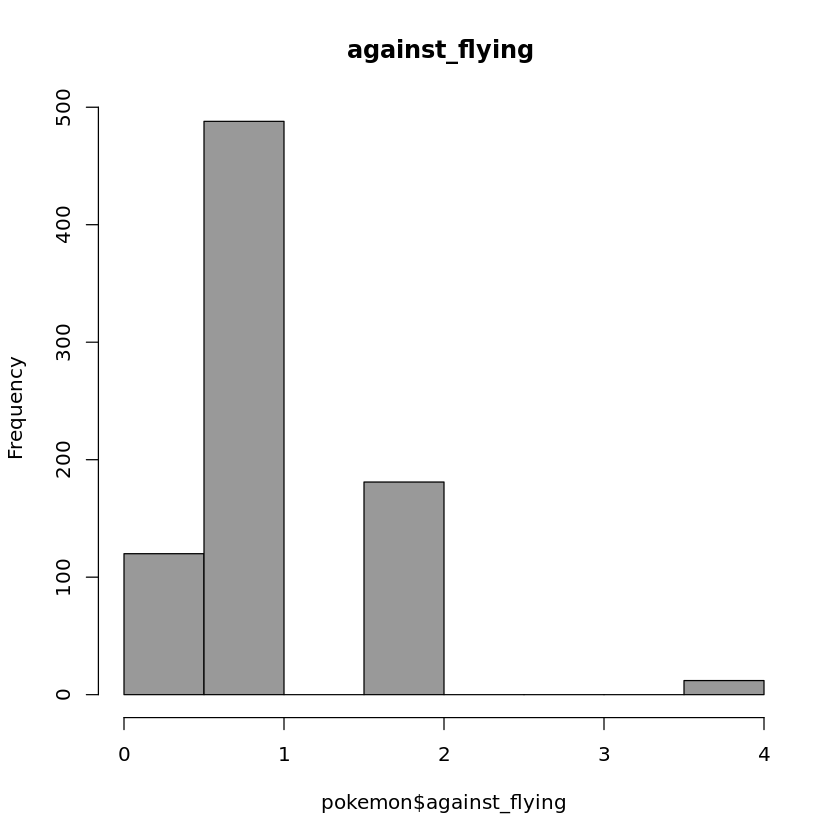

In [13]:
hist(pokemon$against_flying   , main="against_flying ", col='gray60') 

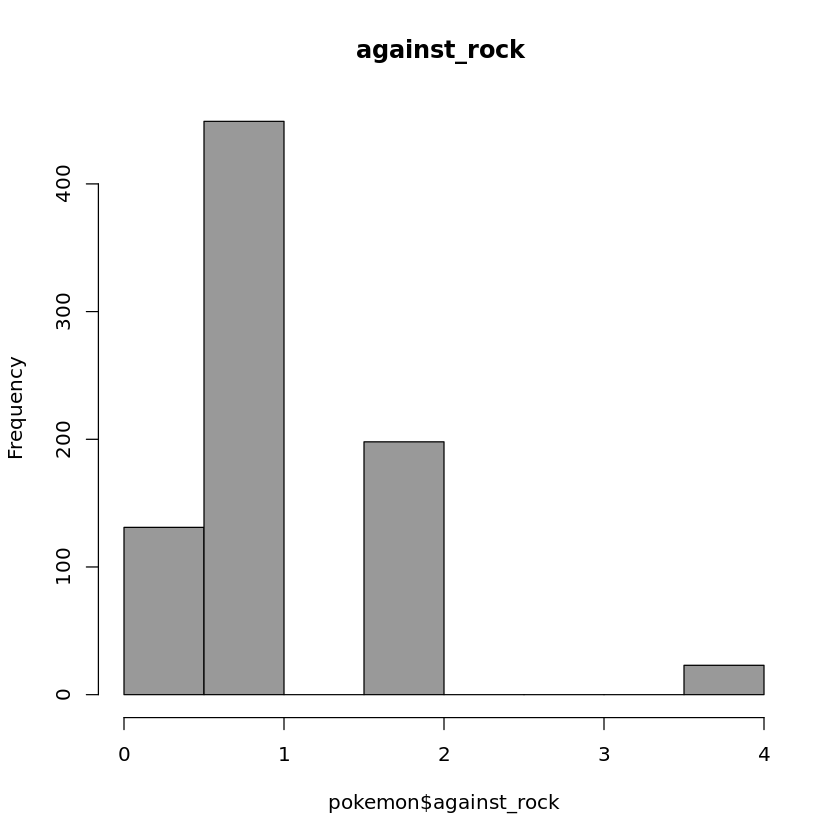

In [14]:
hist(pokemon$against_rock   , main="against_rock ", col='gray60')

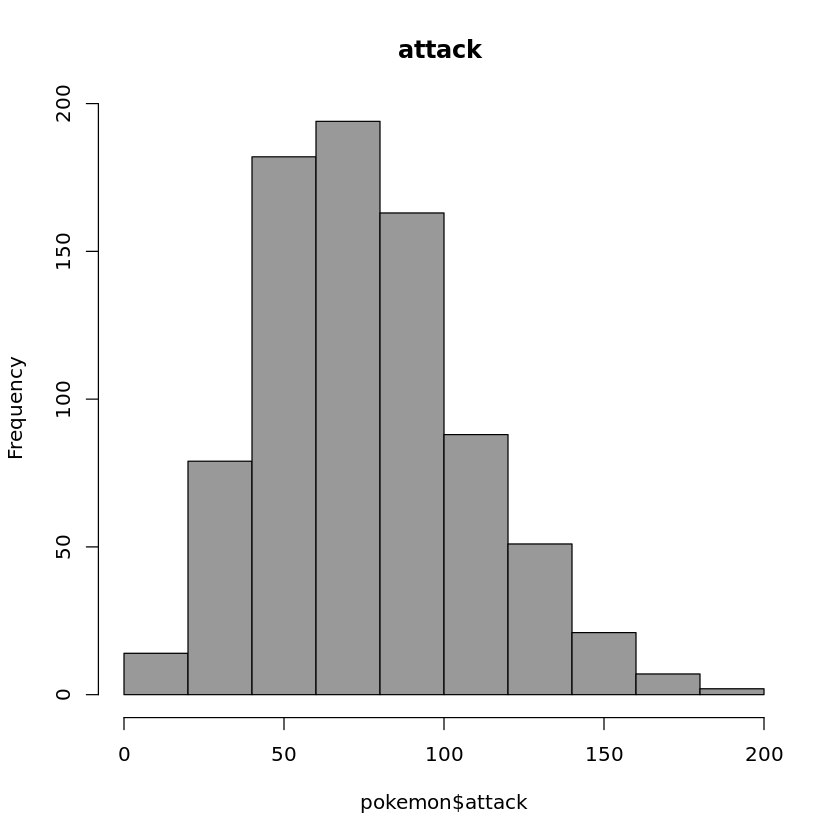

In [16]:
hist(pokemon$attack    , main="attack ", col='gray60')

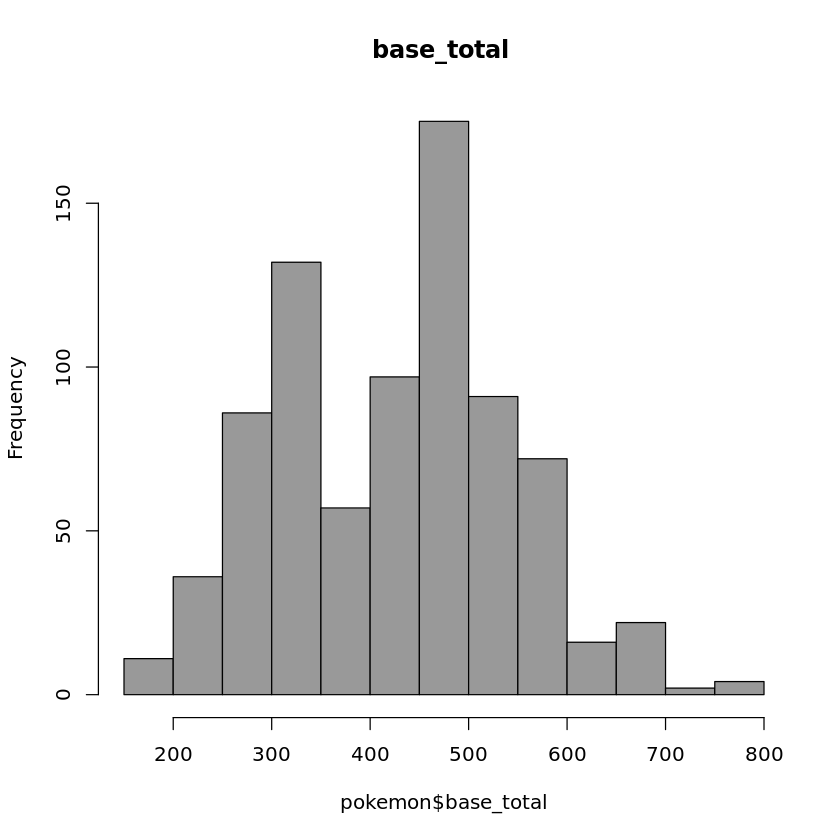

In [17]:
hist(pokemon$base_total, main="base_total ", col='gray60')

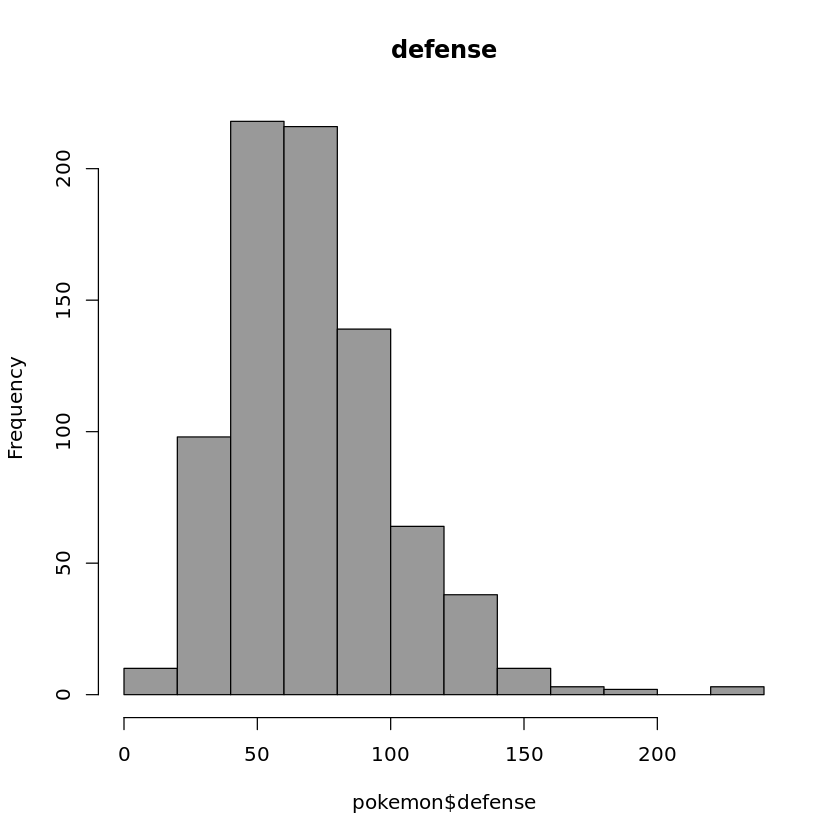

In [15]:
hist(pokemon$defense    , main="defense", col='gray60') 

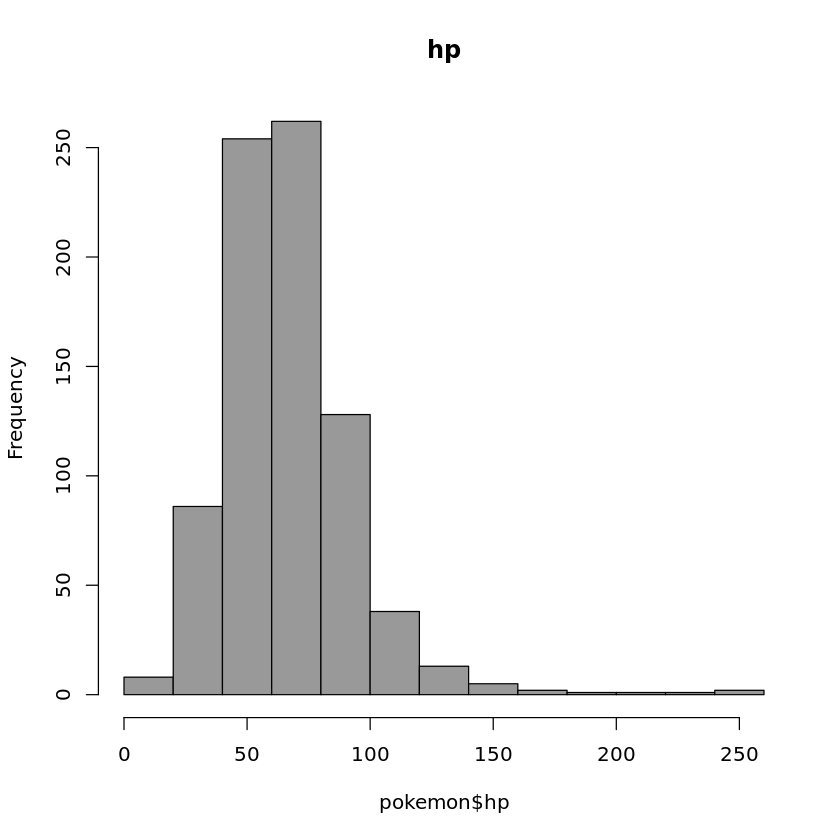

In [18]:
hist(pokemon$hp, main="hp", col='gray60') 

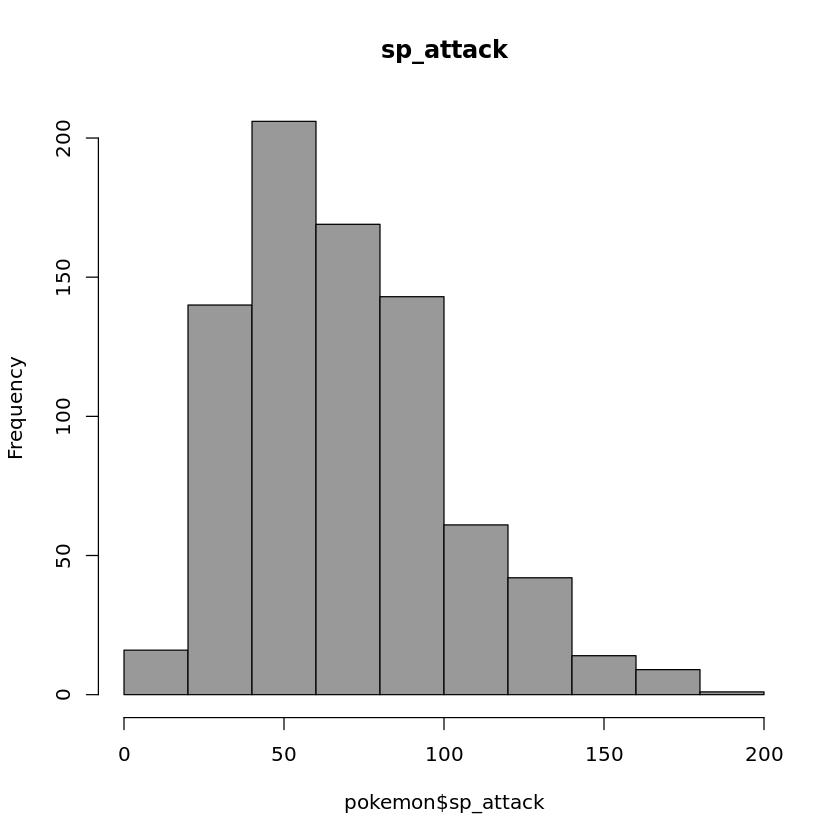

In [19]:
hist(pokemon$sp_attack, main="sp_attack", col='gray60')

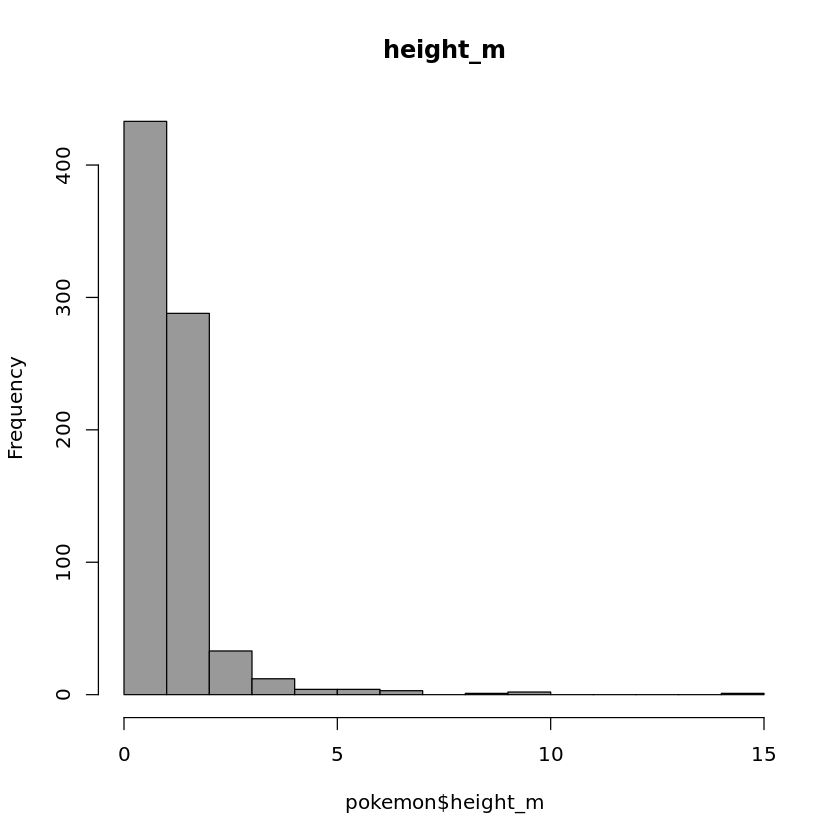

In [20]:
hist(pokemon$height_m, main="height_m", col='gray60')

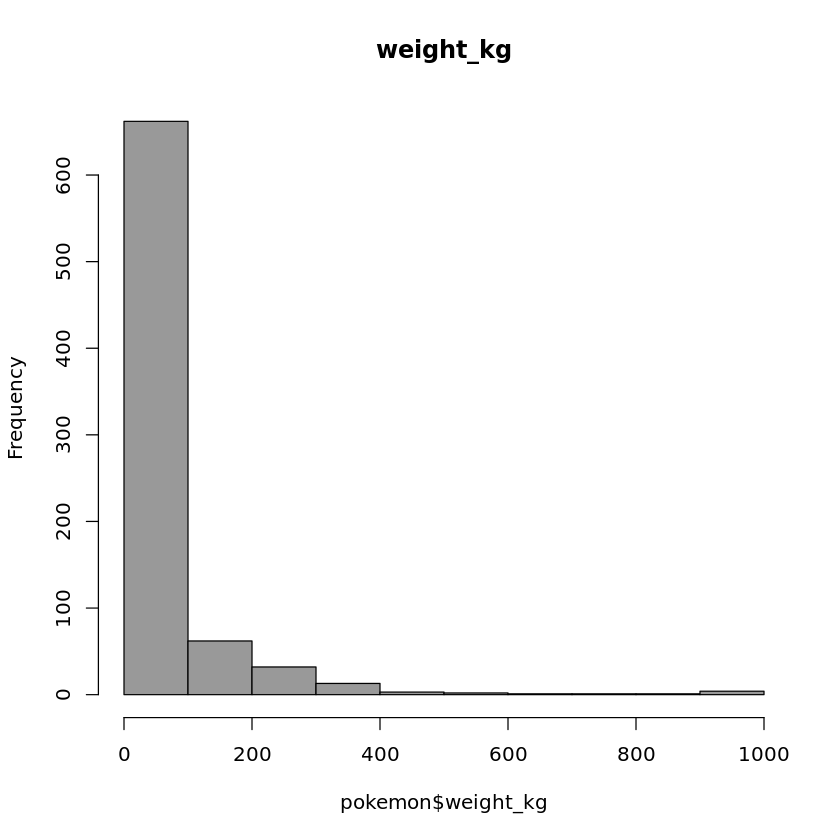

In [21]:
hist(pokemon$weight_kg, main="weight_kg", col='gray60')

In [ ]:
weight_kg 

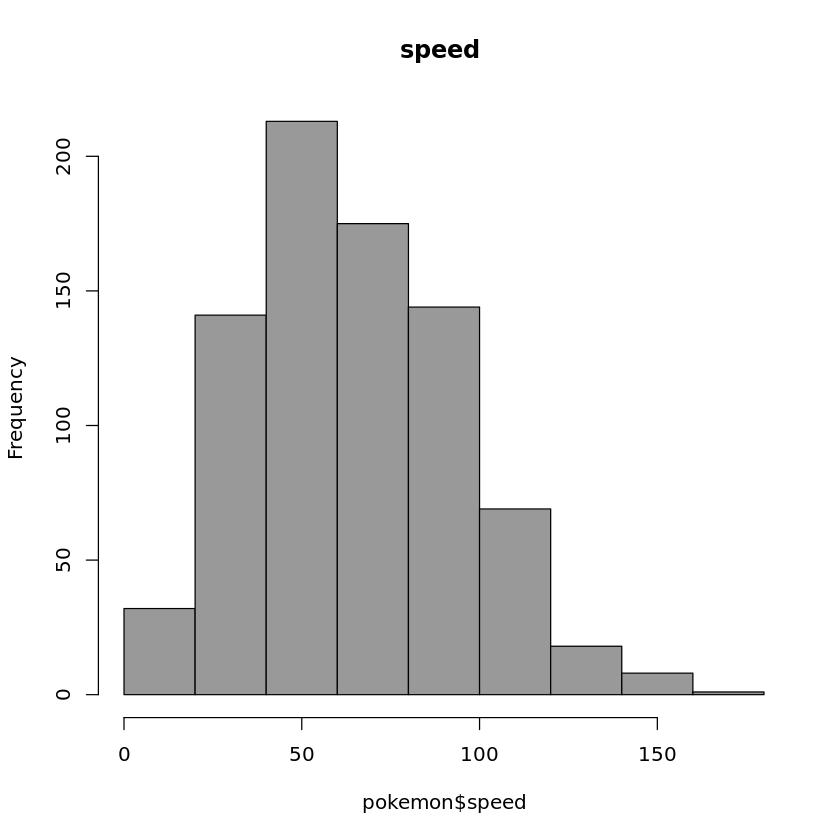

In [22]:
hist(pokemon$speed    , main="speed ", col='gray60') 

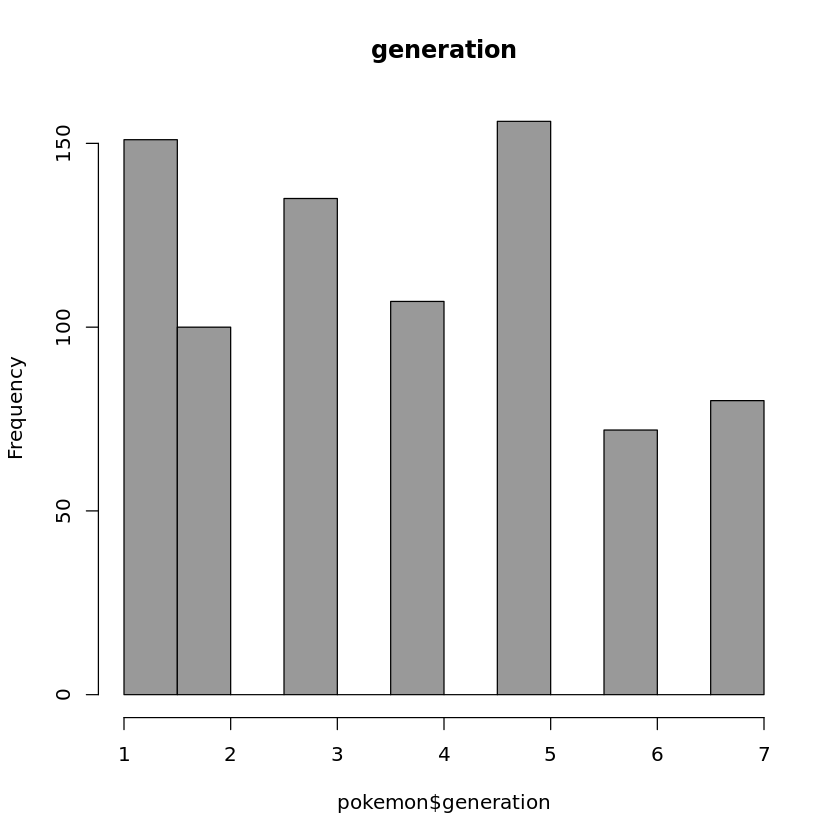

In [17]:
hist(pokemon$generation  , main="generation", col='gray60') 

**De la informacion anterior, seleccionamos los campos de analisis:**

against_*

generation

type1

defense / attack


# Pokemón

## Seccion3:
## Encontrar los 5 pokemones más versátiles y los 5 menos versátiles

In [1]:
#librerías 
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Archivo:

In [2]:
download.file(
  url = "https://raw.githubusercontent.com/jboscomendoza/rpubs/master/pokemon_red/pokemon.csv", 
  destfile = "pokemon.csv")

Leo el archivo dos veces, ya que usaré ambos data frames.

In [26]:
pokemon <- read_csv(file = "pokemon.csv")
pokemon1 <- read_csv(file = "pokemon.csv")
pokemon2 <- read_csv(file = "pokemon.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name =

In [4]:
#str(pokemon)

### Me desago de todas las columnas que no hacen referencia a su eficiencia de ataque

In [5]:
pokemon[ ,c('name', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'abilities', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'  )] <- list(NULL)

### Dejando así:

In [6]:
head(pokemon)

against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,1,2.0,1,1,2,1,1.0,0.5
1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,1,2.0,1,1,2,1,1.0,0.5
1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,1,2.0,1,1,2,1,1.0,0.5
0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,2,0.5,1,1,1,2,0.5,2.0
0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,2,0.5,1,1,1,2,0.5,2.0
0.25,1,1,2.0,0.5,0.5,0.5,1,1,0.25,0,1.0,1,1,1,4,0.5,2.0


### Agrego columna nueva con el promedio de sus eficiencias de ataque 

In [7]:
pokemon[,19] <- rowSums(pokemon)/18

In [8]:
head(pokemon)

against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,...19
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,1,2.0,1,1,2,1,1.0,0.5,1.069444
1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,1,2.0,1,1,2,1,1.0,0.5,1.069444
1.00,1,1,0.5,0.5,0.5,2.0,2,1,0.25,1,2.0,1,1,2,1,1.0,0.5,1.069444
0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,2,0.5,1,1,1,2,0.5,2.0,1.000000
0.50,1,1,1.0,0.5,1.0,0.5,1,1,0.50,2,0.5,1,1,1,2,0.5,2.0,1.000000
0.25,1,1,2.0,0.5,0.5,0.5,1,1,0.25,0,1.0,1,1,1,4,0.5,2.0,1.027778


### Ahora dejaré sólo la columna con el promedio de ataque "poder".

In [9]:
pokemon[ ,c( 'against_bug', 'against_dark' , 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass' ,'against_ground' , 'against_ice' ,'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water' )] <- list(NULL)

In [10]:
names(pokemon)[1] <- "poder"

In [11]:
head(pokemon)

poder
<dbl>
1.069444
1.069444
1.069444
1.000000
1.000000
1.027778


### Ahora de la segunda copia del dataframe original recupero los nombres de los pokemones

In [12]:
pokemon['name']= pokemon1['name']

In [13]:
head(pokemon)

poder,name
<dbl>,<chr>
1.069444,Bulbasaur
1.069444,Ivysaur
1.069444,Venusaur
1.000000,Charmander
1.000000,Charmeleon
1.027778,Charizard


### Ahora se reacomoda el dataframe en función del poder  

In [14]:
top <- pokemon[order(pokemon$poder),]

### Obteniendo así los 5 pokemones menos versátiles:

In [15]:
head(top)

poder,name
<dbl>,<chr>
0.7361111,Mawile
0.7361111,Klefki
0.7361111,Magearna
0.7500000,Skarmory
0.7500000,Celesteela
0.7916667,Dialga


### Los 5 pokemones más versátiles:

In [16]:
tail(top)

poder,name
<dbl>,<chr>
1.388889,Abomasnow
1.388889,Sewaddle
1.388889,Swadloon
1.388889,Leavanny
1.444444,Amaura
1.444444,Aurorus


### Como extra podemos obserbar la distribución de poder en la población de pokemones

In [17]:
versatilidad <- top[['poder']]

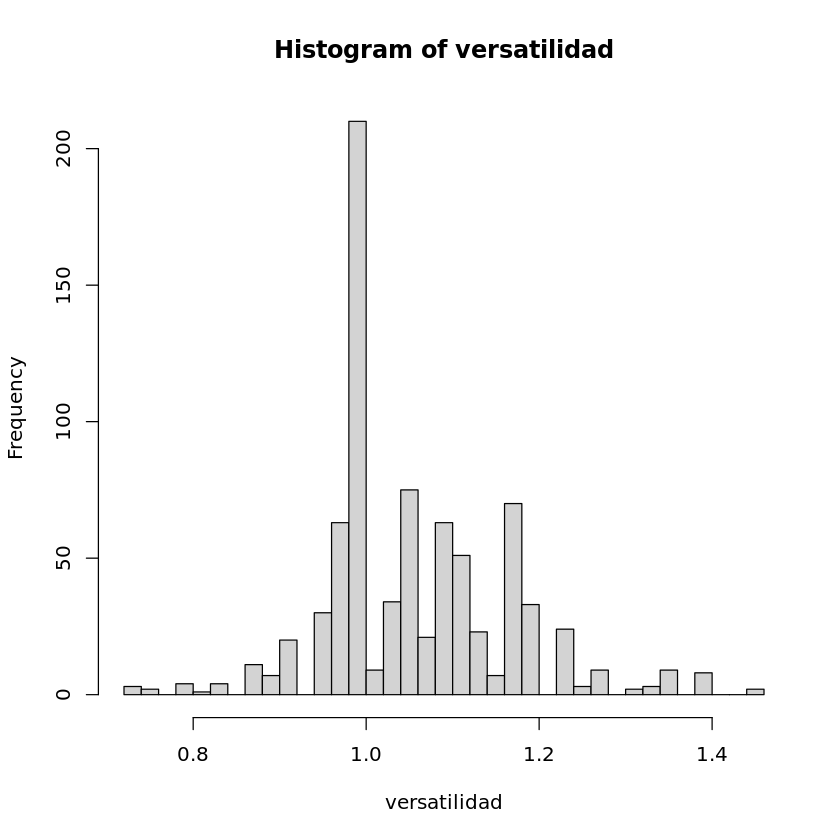

In [18]:
hist(versatilidad, 28)

### Ahora trabajaremos la estadística de "versatilidad"

In [19]:
prom <- mean(versatilidad)

In [20]:
desv <- sd(versatilidad)

In [21]:
cat('promedio:', prom, 'desviación estandar:', desv)

promedio: 1.058 desviación estandar: 0.1058614

### Se le asocia una curva normal a la distribución con los valores ya calculados de promedio y desviación estandar

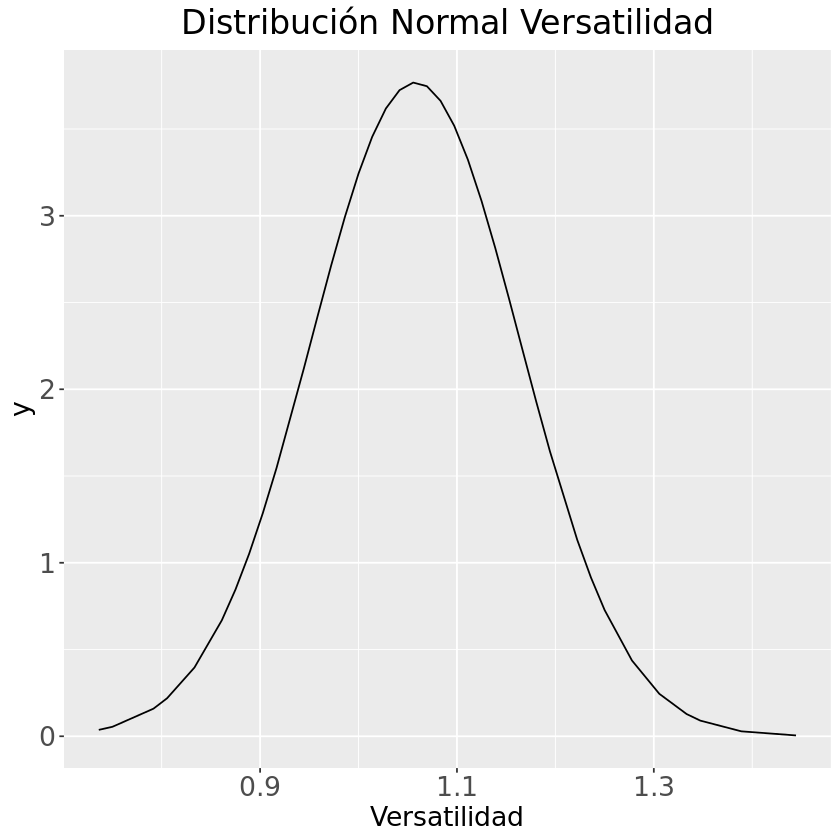

In [22]:
vec <- versatilidad #seq(-3,3,by=.1) 
y <- dnorm(versatilidad, prom, desv)  #evaluate dnorm in vec
qplot(vec,y,geom='line') +  #qplot is quickplot
ggtitle('Distribución Normal Versatilidad') + 
theme(plot.title = element_text(size=20, hjust = 0.5),
      axis.text=element_text(size=16),
      axis.title=element_text(size=16)) +
xlab('Versatilidad')

### A hora podemos hacernos preguntas cómo:

**Si me escojo una carta al azar ¿cuál es la probabilidad de que me toque un pokemon de verstilidad mayor a 1.3?**

In [23]:
pnorm(1.3, mean=prom , sd=desv, lower.tail=FALSE) 

[1] 0.01112703

La probabilidad sería del $1.11$ % 

**¿Cuál es la probabilidad de que me toque un pokemon con versatilidad igual o menor a .8?**

In [24]:
pnorm(1, mean=prom , sd=desv, lower.tail=T) 

[1] 0.2918837

La probabilidad sería del $29.18$ % 

# Pokemón

## Seccion 4:
## Generar tabla de frecuencias de generación de pokemones

In [27]:
head(pokemon2)

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,4,60,50,65,fire,NA,8.5,1,0
"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,5,80,65,80,fire,NA,19.0,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,⋯,88.1,6,159,115,100,fire,flying,90.5,1,0


### Tomamos columna de generacion "generation"

In [28]:
gen <- pokemon2[['generation']]

### Se encuentra la siguiente distribución en los datos

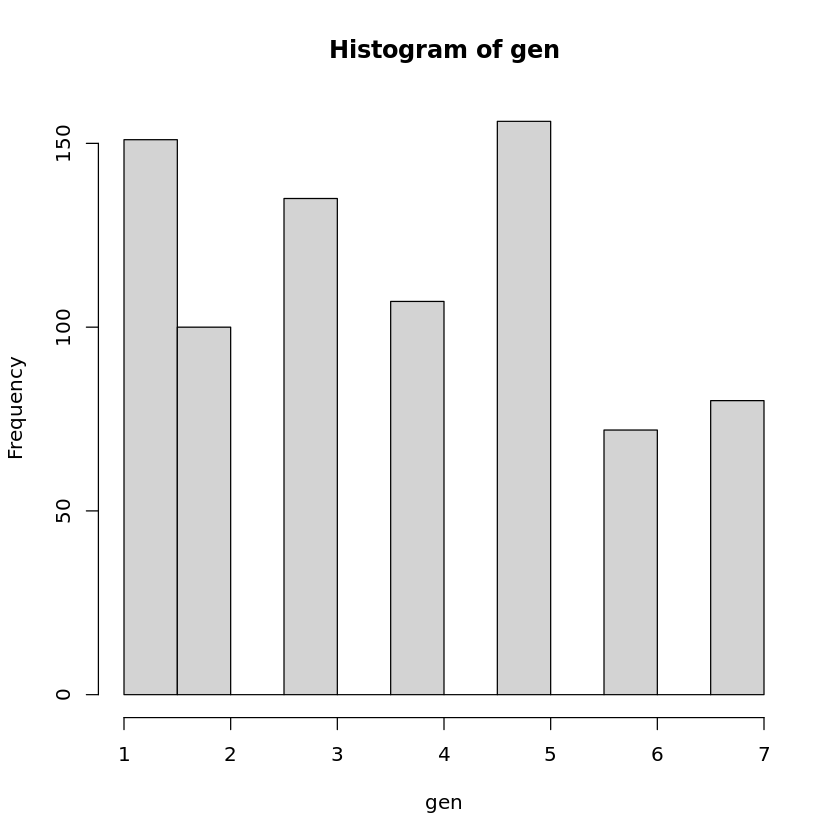

In [29]:
hist(gen)

### Procedemos a contar cuántos hay por generación

In [30]:
gen_1 <- 0
gen_2 <- 0
gen_3 <- 0
gen_4 <- 0
gen_5 <- 0
gen_6 <- 0
gen_7 <- 0

for(i in gen) {
   if (i == 1) {
        gen_1 <- gen_1 + 1}
    else if ( i == 2) {
        gen_2 <- gen_2 + 1
}
    else if ( i == 3) {
        gen_3 <- gen_3 + 1
}
    else if ( i == 4) {
        gen_4 <- gen_4 + 1
}
    else if ( i == 5) {
        gen_5 <- gen_5 + 1
}
    else if ( i == 6) {
        gen_6 <- gen_6 + 1
}
    else if ( i == 7) {
        gen_7 <- gen_7 + 1
}
}

In [31]:
cat(gen_1, gen_2, gen_3, gen_4, gen_5, gen_6, gen_7)

151 100 135 107 156 72 80

### Calculamos las frecuencias y las probabilidades asociadas a cada generación

In [32]:
total <- length(gen)
P_g1 <- gen_1/total
P_g2 <- gen_2/total
P_g3 <- gen_3/total
P_g4 <- gen_4/total
P_g5 <- gen_5/total
P_g6 <- gen_6/total
P_g7 <- gen_7/total

generaciones <- c(1,2,3,4,5,6,7)

Probs_gen <- c(P_g1, P_g2, P_g3,P_g4, P_g5, P_g6, P_g7 )
Probs_gen

[1] 0.18851436 0.12484395 0.16853933 0.13358302 0.19475655 0.08988764 0.09987516

In [33]:
sum(Probs_gen) #la suma de las probabilidades da 1

[1] 1

In [34]:
df_gen<- data.frame(generaciones, Probs_gen)
df_gen

generaciones,Probs_gen
<dbl>,<dbl>
1,0.18851436
2,0.12484395
3,0.16853933
4,0.13358302
5,0.19475655
6,0.08988764
7,0.09987516


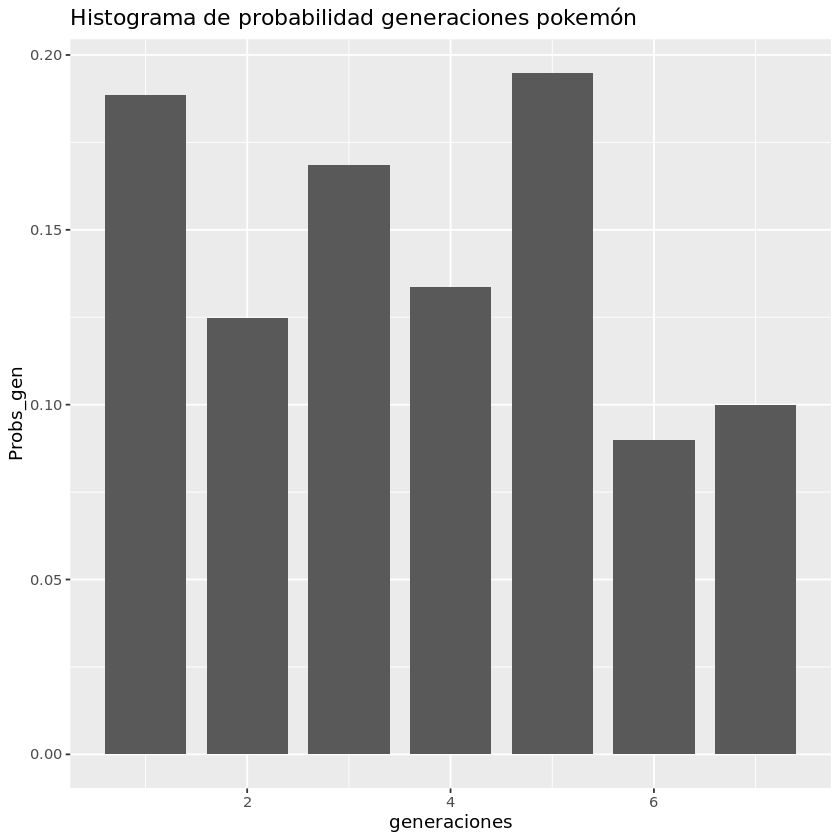

In [35]:
ggplot(data = df_gen, aes(x=generaciones, y=Probs_gen)) + geom_col(width=.8) +
ggtitle('Histograma de probabilidad generaciones pokemón')

### Con las frecuencias de apración, podemos hacernos preguntas cómo:

**Si me escojo una carta al azar ¿cuál es la probabilidad de que me toque un pokemon de generación 4?**

In [36]:
P_g4

[1] 0.133583

La probabilidad sería del $13.35$ %

In [37]:
probabilidad_gen <- function(n) {
    #función que me regresa probabilidad de que pokemon sea igual o menor a n 
    p <- 0
    for (i in 1:n){
        p <- p + Probs_gen[i]
    }
    return (p )   
}

In [38]:
probabilidad_gen(2)

[1] 0.3133583

### Así ahora puedo responder a preguntas cómo ¿Cuál es la probabilidad de que me toque un pokemon de generación igual o menor a 5?

In [39]:
probabilidad_gen(5)

[1] 0.8102372

La probabilidad sería del $81.02$ %

# Pokemón

## Seccion 5:
## Analisis de Ataque/defensa

In [3]:
library(tidyverse)
library(prob)
library(ggplot2)
library(tidyr)
library("dplyr")

In [17]:
options(repr.plot.width=8, repr.plot.height=8)

In [4]:
pokemon <- read_csv(file = "pokemon.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.




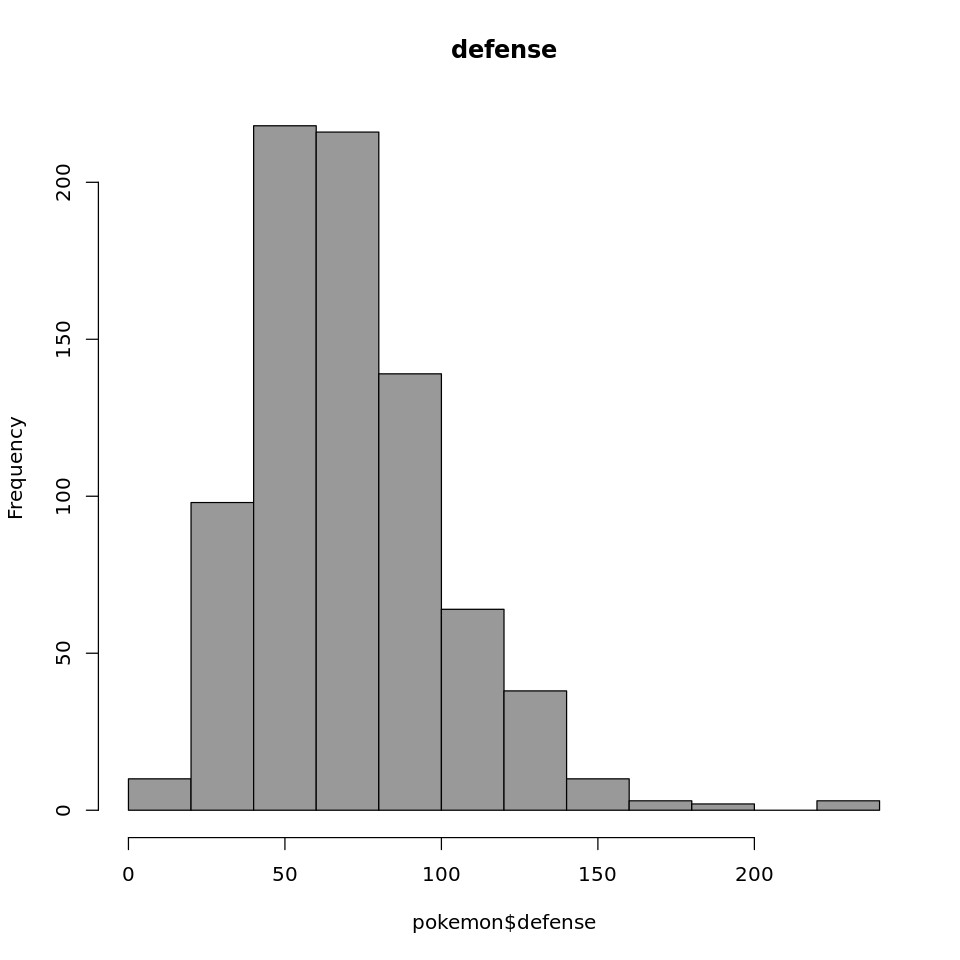

In [18]:
hist(pokemon$defense    , main="defense", col='gray60') 

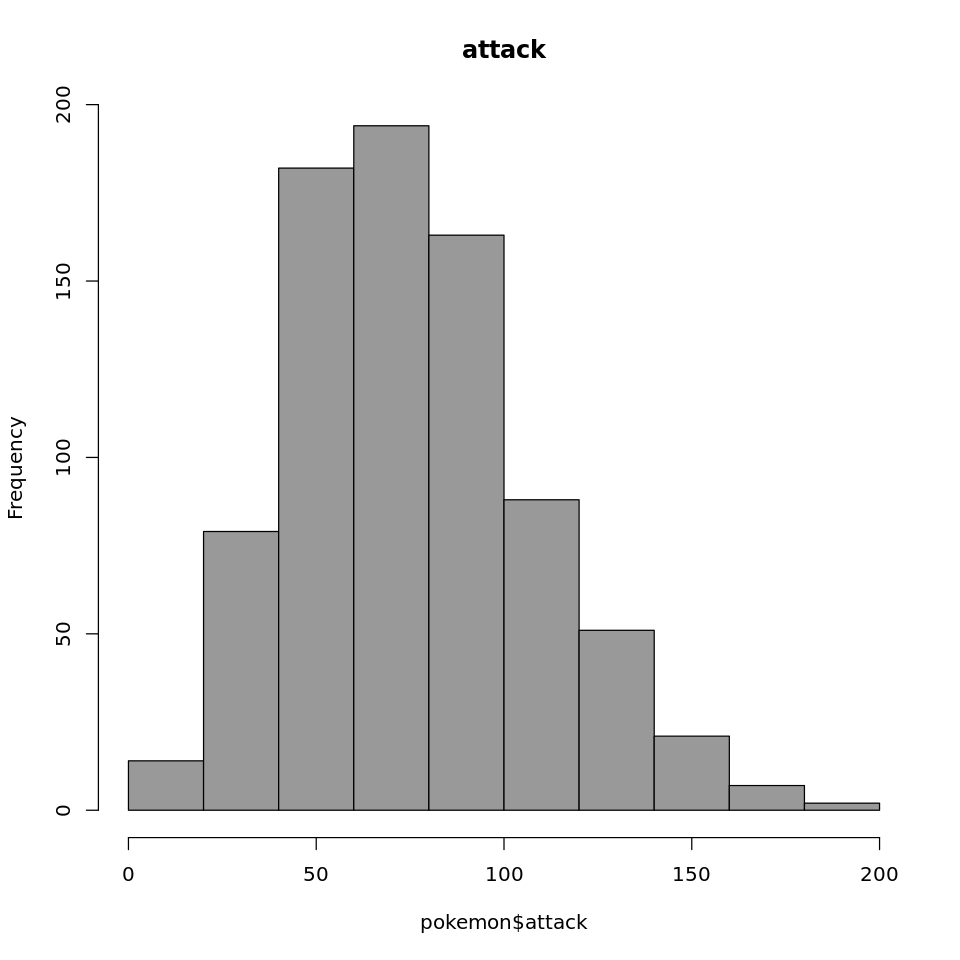

In [19]:
hist(pokemon$attack     , main="attack", col='gray60') 

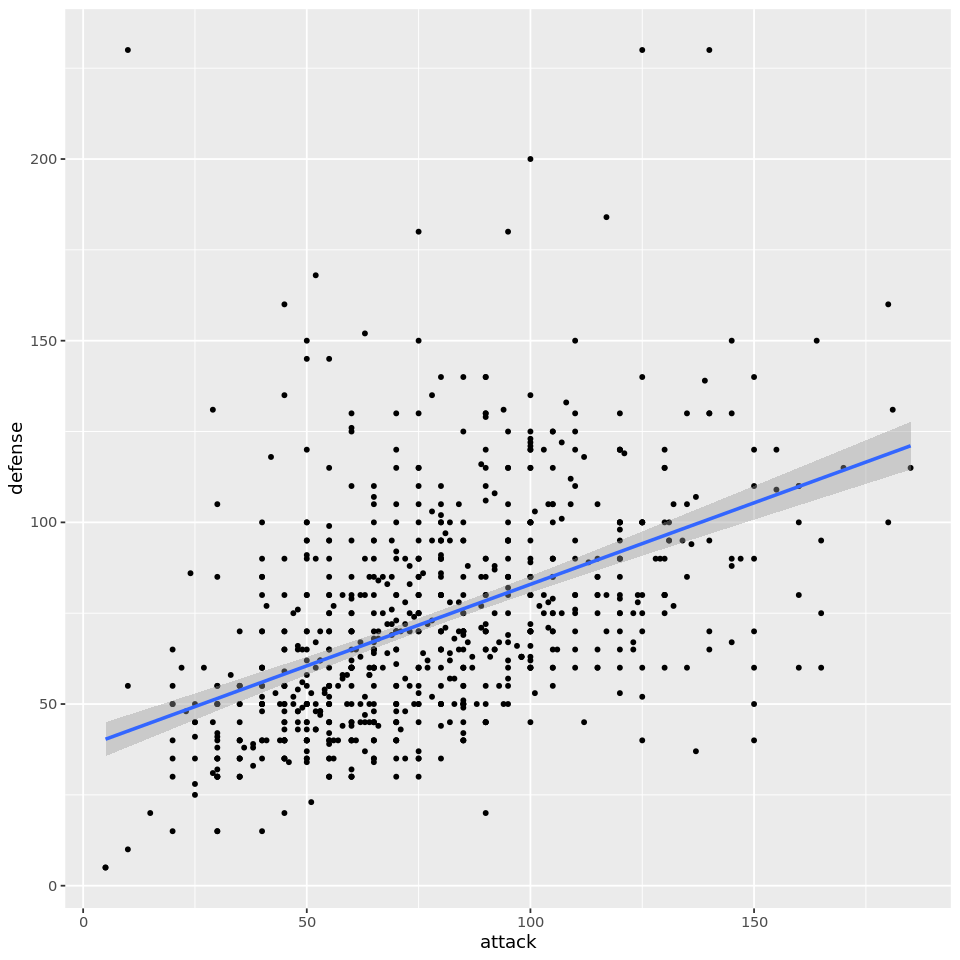

In [20]:
ggplot(pokemon)+
geom_point(aes(x=attack, y=defense),size=1) +
geom_smooth(formula = "y~x", aes(x=attack, y=defense),method="lm")

In [21]:
def_att <- data.frame(pokemon$defense,pokemon$attack,pokemon$type1 )

calculos de medias 

In [22]:
median_def <- median(pokemon$defense)
median_att <- median(pokemon$attack)

In [23]:
power_att <- ifelse(pokemon$attack >= median_att, "fuerte", "debil")
power_def <- ifelse(pokemon$defense >= median_def, "fuerte", "debil")

In [24]:
def_att_gg <- gather(data = def_att, key = "medida", value = "valor", 1:2)
def_att_gg$power <-c(power_att, power_def)
head(def_att_gg)

,pokemon.type1,medida,valor,power
,<chr>,<chr>,<dbl>,<chr>
1,grass,pokemon.defense,49,debil
2,grass,pokemon.defense,63,debil
3,grass,pokemon.defense,123,fuerte
4,fire,pokemon.defense,43,debil
5,fire,pokemon.defense,58,debil
6,fire,pokemon.defense,78,fuerte


In [25]:
head(def_att)

,pokemon.defense,pokemon.attack,pokemon.type1
,<dbl>,<dbl>,<chr>
1,49,49,grass
2,63,62,grass
3,123,100,grass
4,43,52,fire
5,58,64,fire
6,78,104,fire


In [26]:
gf <- ggplot(data=def_att_gg)

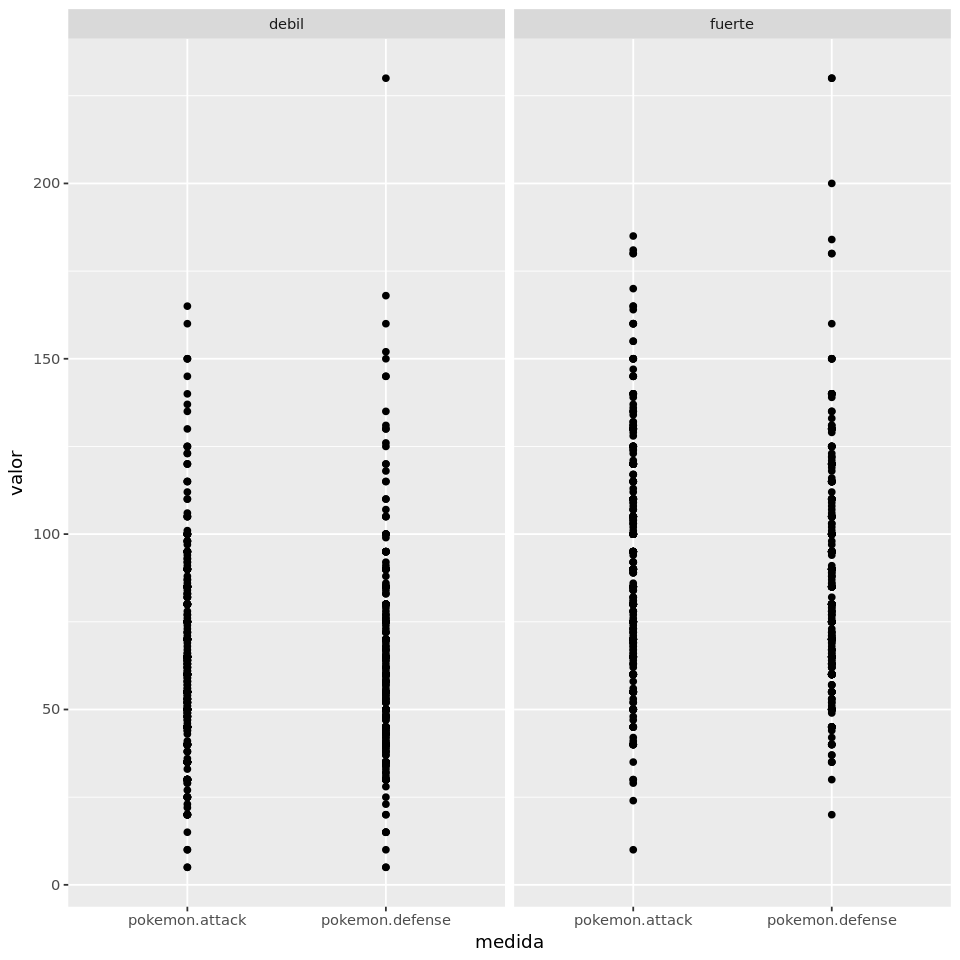

In [27]:
gf + geom_point(aes(x=medida,y=valor),size=1.5)+
facet_wrap(~power)

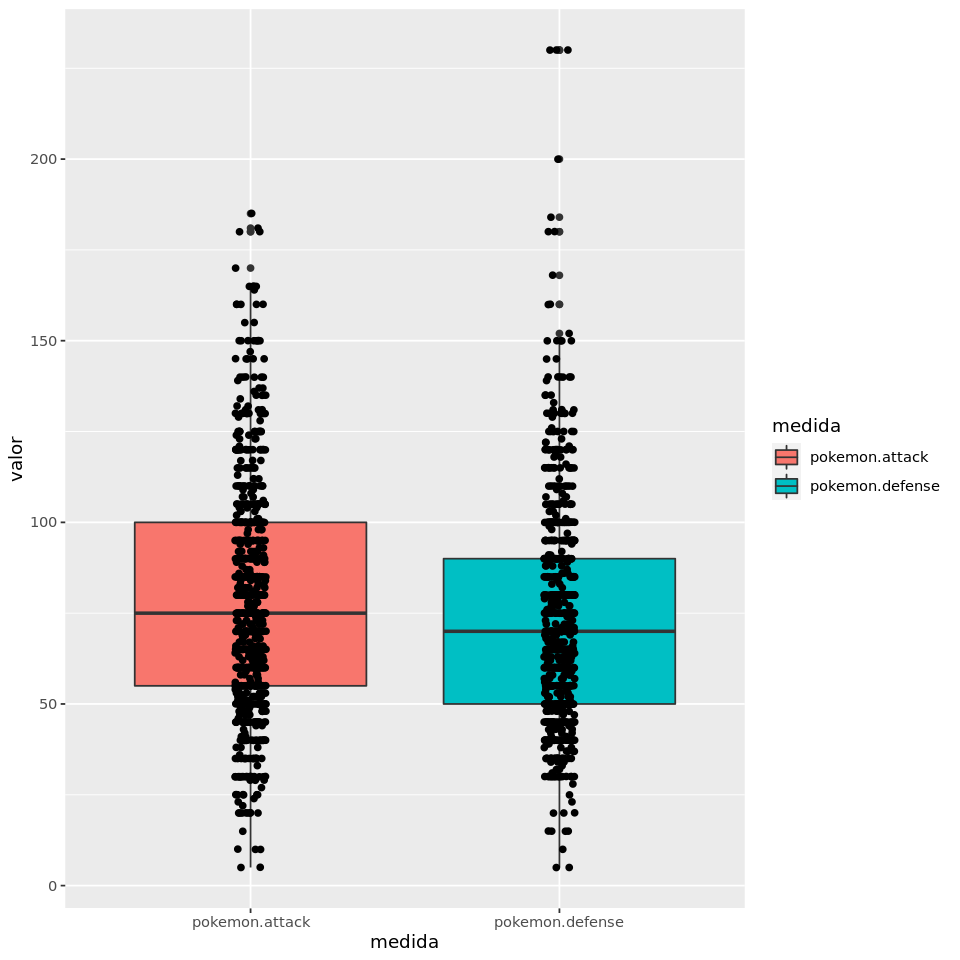

In [28]:
gf + 
geom_boxplot(aes(x=medida, y=valor, fill = medida)) + 
geom_jitter(aes(x=medida,y=valor),
            position=position_jitter(width=0.05,height=0.05),
            size=1.5)

In [29]:
summary(def_att_gg)

 pokemon.type1         medida              valor           power          
 Length:1602        Length:1602        Min.   :  5.00   Length:1602       
 Class :character   Class :character   1st Qu.: 52.00   Class :character  
 Mode  :character   Mode  :character   Median : 70.00   Mode  :character  
                                       Mean   : 75.43                     
                                       3rd Qu.: 95.00                     
                                       Max.   :230.00                     

In [38]:
def_att$name <- pokemon$name

In [40]:
def_att$razon <-  pokemon$attack/ pokemon$defense

In [51]:
def_att %>% 
  arrange(razon) -> ord
   


### Con esta información podemos contestar preguntas como:

### ¿Cuáles Pokemones tienen una razón de mayor defensa vs ataque?

In [59]:
subset(ord, razon < 1 ) %>% head

,pokemon.defense,pokemon.attack,pokemon.type1,name,razon
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,230,10,bug,Shuckle,0.04347826
2,55,10,water,Magikarp,0.18181818
3,131,29,psychic,Cosmoem,0.22137405
4,86,24,steel,Bronzor,0.27906977
5,160,45,rock,Onix,0.28125000
6,105,30,fire,Darmanitan,0.28571429


### ¿Cuáles Pokemones tienen una razón de mayor ataque vs defensa?


In [56]:
subset(ord, razon > 1 ) %>% tail

,pokemon.defense,pokemon.attack,pokemon.type1,name,razon
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
796,60,165,rock,Rampardos,2.750000
797,50,150,steel,Aegislash,3.000000
798,40,125,rock,Cranidos,3.125000
799,37,137,bug,Pheromosa,3.702703
800,40,150,bug,Beedrill,3.750000
801,20,90,water,Carvanha,4.500000


### ¿Que pokemones tiñen un equilibrio entre su ataque y defensa?

In [62]:
subset(ord, razon == 1 ) %>% tail

,pokemon.defense,pokemon.attack,pokemon.type1,name,razon
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
368,69,69,water,Brionne,1
369,74,74,water,Primarina,1
370,70,70,fire,Oricorio,1
371,95,95,normal,Type: Null,1
372,95,95,normal,Silvally,1
373,139,139,bug,Buzzwole,1


# Pokemón

## Seccion 6:
## Análisis tipos de pokemones

In [4]:
library(tidyverse)
library(prob)
library(ggplot2)
library(tidyr)
library("dplyr")

In [5]:
options(repr.plot.width=10, repr.plot.height=10)

**Se lee la informacion del archivo CSV**

In [6]:
pokemon <- read_csv(file = "pokemon.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [7]:
head(pokemon)


abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,4,60,50,65,fire,NA,8.5,1,0
"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,5,80,65,80,fire,NA,19.0,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,⋯,88.1,6,159,115,100,fire,flying,90.5,1,0


**Se extrae el renglon type1 para analizar**

In [8]:
tipo1 <- pokemon$type1 


**con la funcion unique se puede visualiar los distintos tipos de pokemon que existen**

In [9]:
unique(tipo1)


[1] "grass"    "fire"     "water"    "bug"      "normal"   "poison"  
 [7] "electric" "ground"   "fairy"    "fighting" "psychic"  "rock"    
[13] "ghost"    "ice"      "dragon"   "dark"     "steel"    "flying"

**con la funcion table se generar una tabla con la frecuencia de cada tipo**

In [10]:
x <-table(tipo1)

**con prop.table se transforma a proporciones relativas**

In [11]:
prop <- prop.table(x) 

In [12]:
options(repr.plot.width=18, repr.plot.height=7)

**Se grafica con barplot**

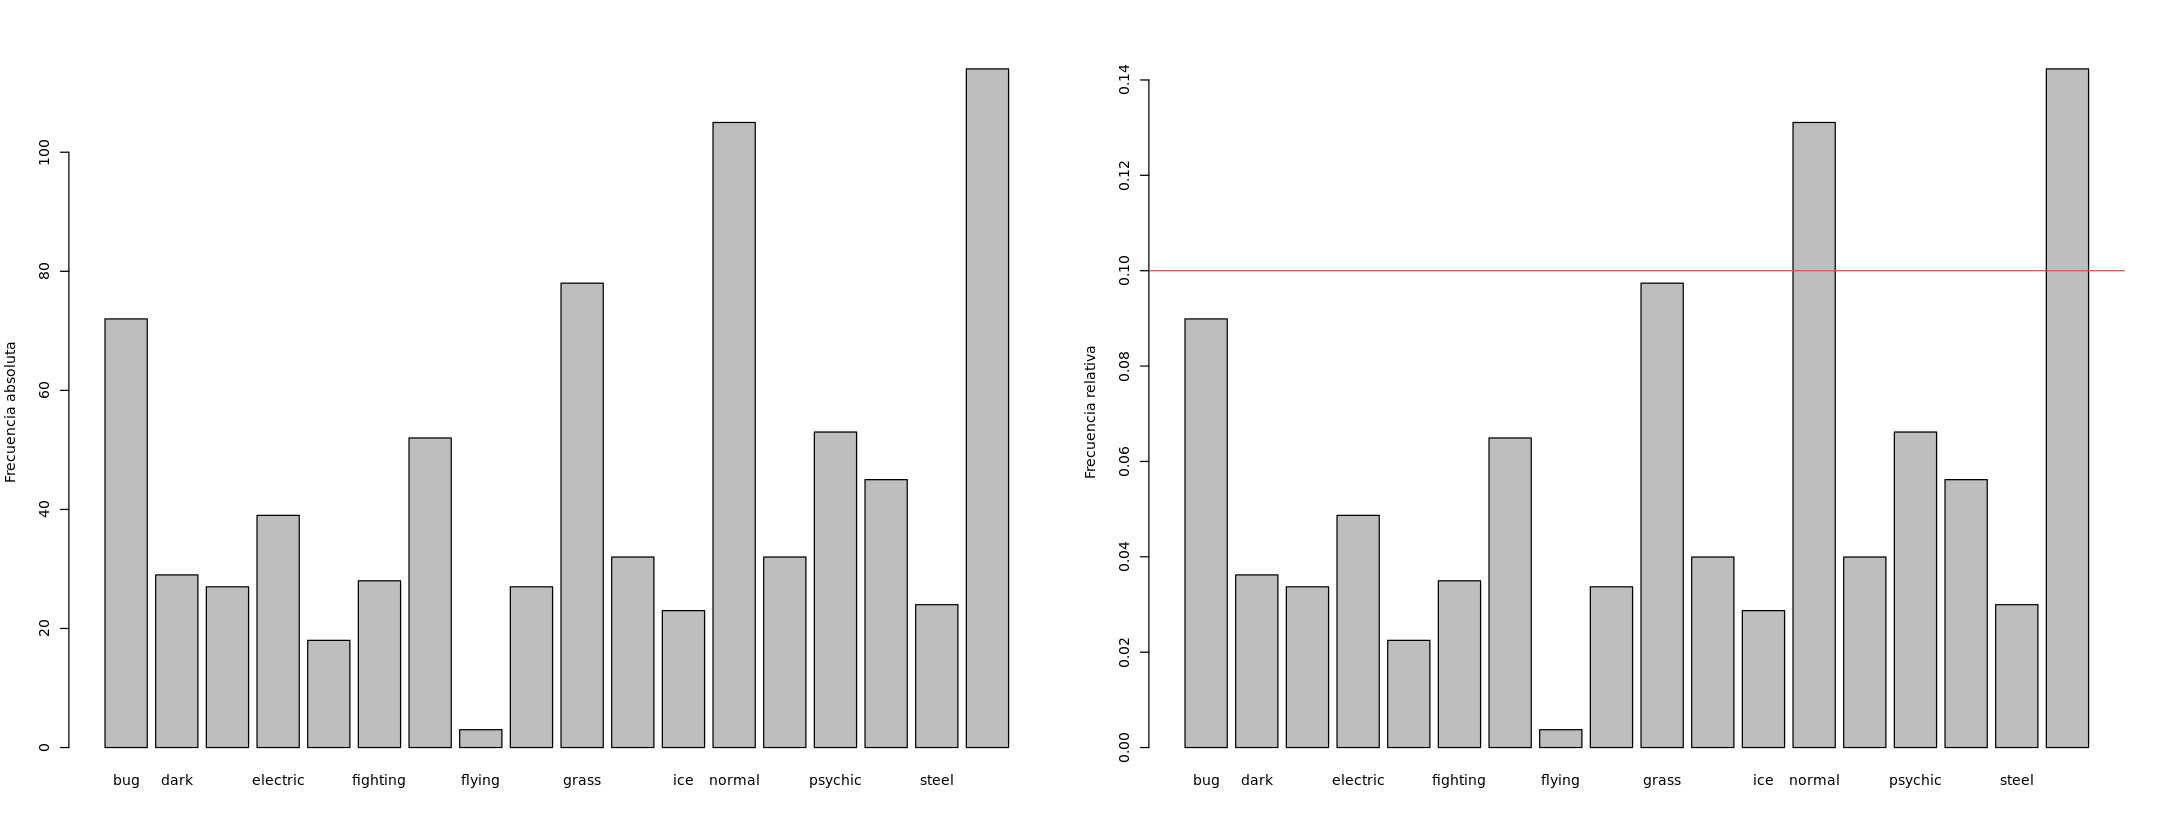

In [13]:
par(mfcol=c(1,2)) #subplots
par(cex=0.7) #control size of labels
barplot(x, ylab='Frecuencia absoluta')
barplot(prop, ylab='Frecuencia relativa')
abline(h = .1, col='coral3')  #to plot a line in .1 with 0 slope

**Para una visualizacion mas clara se decide ordenarlos por frecuencia**

In [14]:
tipo_ordenado <- x[order(x)]

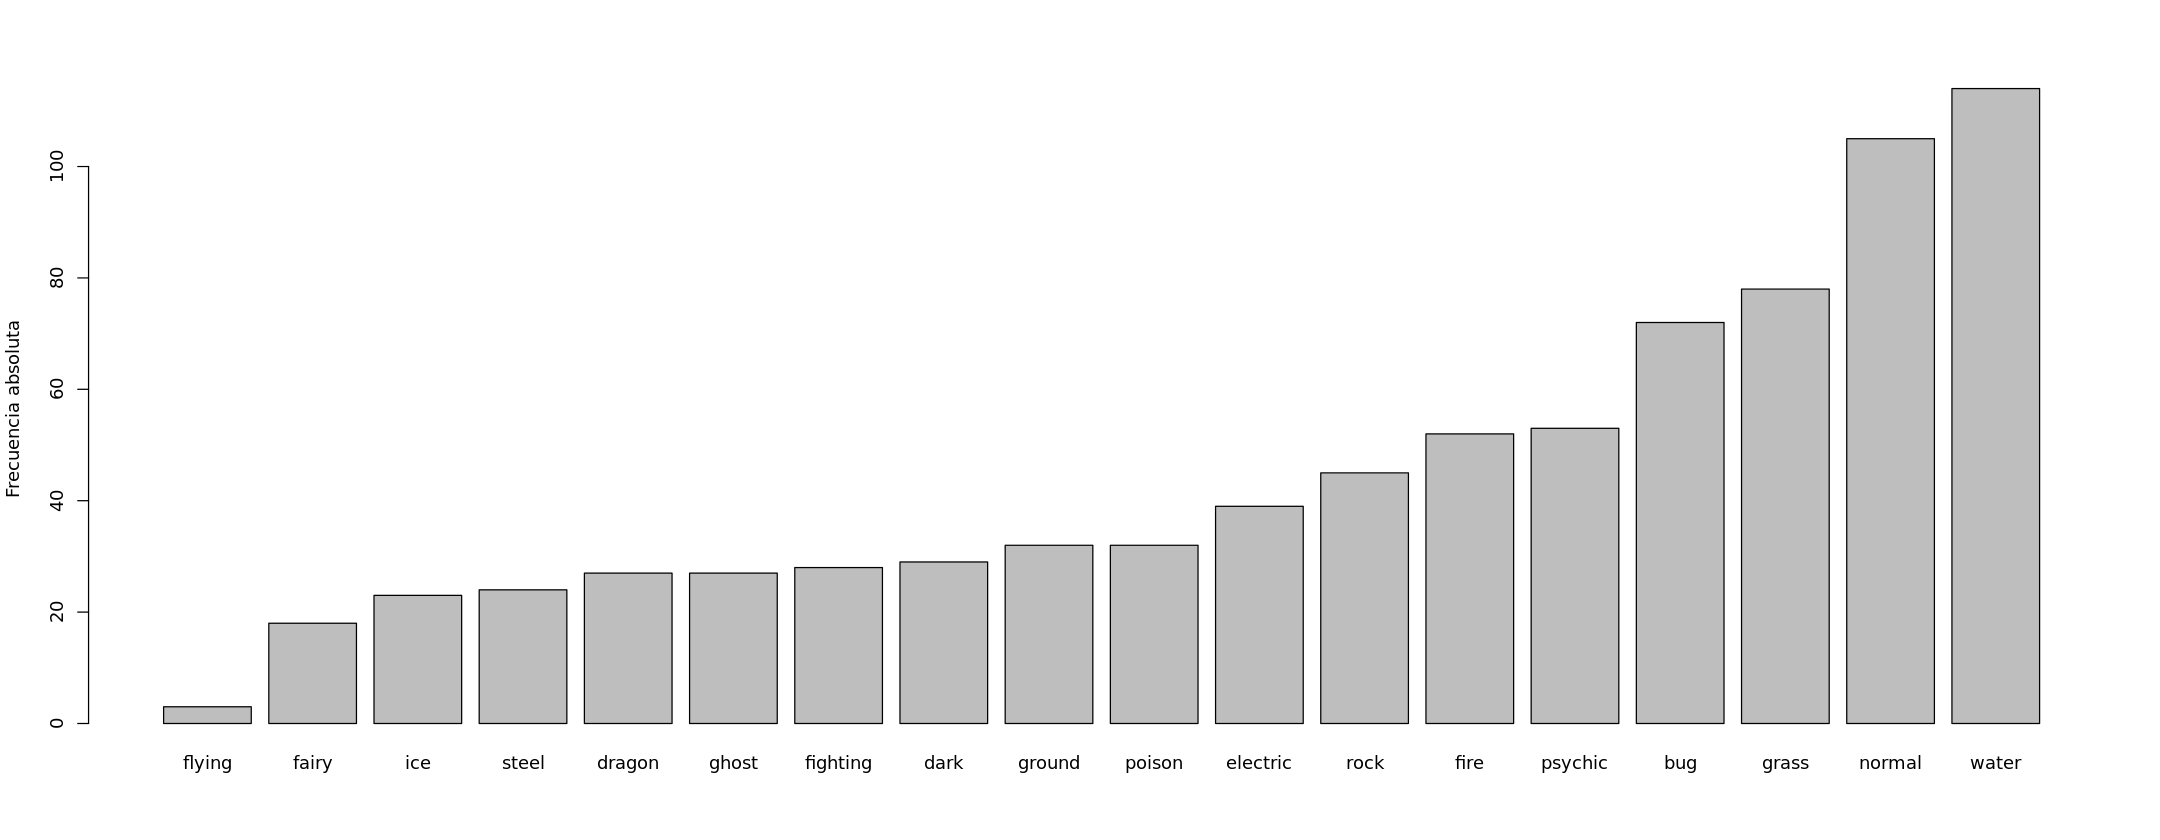

In [15]:
par(cex=0.9) #control size of labels
barplot(tipo_ordenado, ylab='Frecuencia absoluta')

In [16]:
prop <- prop.table(tipo_ordenado) 

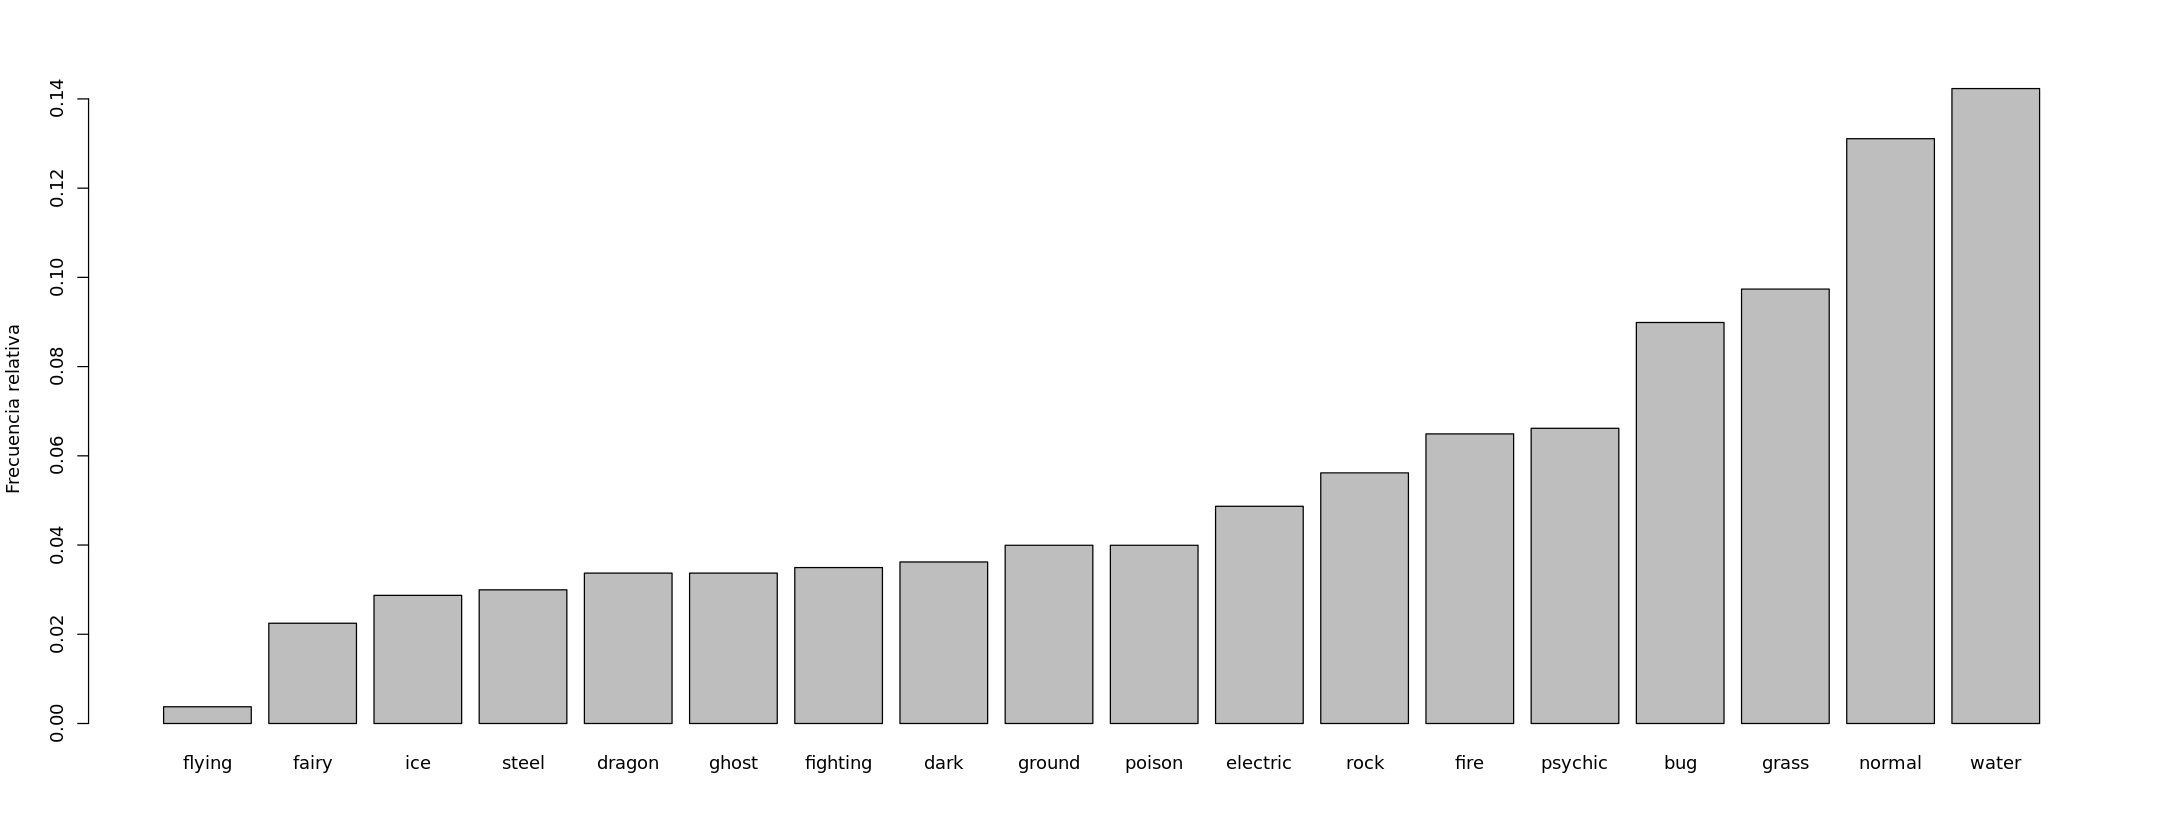

In [17]:
par(cex=0.9) #control size of labels
barplot(prop, ylab='Frecuencia relativa')

In [18]:
prop

tipo1
     flying       fairy         ice       steel      dragon       ghost 
0.003745318 0.022471910 0.028714107 0.029962547 0.033707865 0.033707865 
   fighting        dark      ground      poison    electric        rock 
0.034956305 0.036204744 0.039950062 0.039950062 0.048689139 0.056179775 
       fire     psychic         bug       grass      normal       water 
0.064918851 0.066167291 0.089887640 0.097378277 0.131086142 0.142322097 

In [19]:
proptipo <- as.data.frame(prop)

### se pueden contestar preguntas como:

### ¿Cuál es la probabilidad de sacar un Pokemon de agua?

In [23]:
subset(proptipo, tipo1 == "water")

,tipo1,Freq
,<fct>,<dbl>
18,water,0.1423221
